## Build me a map, ChatGPT

#### Prompt 1:

I need you to the website located at the URL below and create me a sandwich map.

This is the URL:
https://www.nytimes.com/interactive/2024/dining/best-nyc-sandwiches.html


#### Prompt 2:

I need to parse the website at the url below and extract the following items:
- sandwich names 
- restaurant names
- addresses
- description
- images

This is the URL:
https://www.nytimes.com/interactive/2024/dining/best-nyc-sandwiches.html

#### ChatGPT Response:

"​I'm unable to access the specific content of the New York Times article at the provided URL."

## Write the Python code to scrape the website for me, ChatGPT

#### Prompt:

Write python code to parse the website at the url below and extract the following items:
- sandwich-names: class="sandwich-name" 
- restaurant-names: class="restaurant-name"
- meta-data: class="metadata svelte-1w102ch"
- description: class="g-text svelte-1w102ch"
- images: class="g-image svelte-z1ymna"
    - if the image URL contains "big_assets", then I want to ensure the URL also ends with a "-1.png"

## Extract Data from HTML


In [85]:
from bs4 import BeautifulSoup
import requests

# Fetch the webpage content
url = "https://www.nytimes.com/interactive/2024/dining/best-nyc-sandwiches.html"  # Replace with the actual URL
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [86]:
# soup

In [87]:
# soup.find_all(class_="sandwich-name")

#### Get `restaurants`, `sandwhich_names`, `meta_data`, `descriptions`

In [88]:
sandwich_names = []
restaurants = []
meta_data = []
descriptions = []

for tag in soup.find_all(class_="sandwich-name"):
    sandwich_names.append(tag.text.strip())

for tag in soup.find_all(class_="restaurant-name"):
    restaurants.append(tag.text.strip())

for tag in soup.find_all(class_="metadata svelte-1w102ch"):
    meta_data.append(tag.text.strip())

for tag in soup.find_all(class_="g-text svelte-1w102ch"):
    descriptions.append(tag.text.strip())


print length of every list

In [89]:
print("Length of restaurants:", len(restaurants))
print("Length of sandwich_names:", len(sandwich_names))
print("Length of meta_data:", len(meta_data))
print("Length of descriptions:", len(descriptions))

Length of restaurants: 57
Length of sandwich_names: 57
Length of meta_data: 56
Length of descriptions: 57


print first and last item for every list

In [90]:
print("First item of restaurants:", restaurants[0])
print("Last item of restaurants:", restaurants[-1])

print("First item of sandwich_names:", sandwich_names[0])
print("Last item of sandwich_names:", sandwich_names[-1])

print("First item ofmeta_data:",meta_data[0])
print("Last item ofmeta_data:",meta_data[-1])

print("First item of descriptions:", descriptions[0])
print("Last item of descriptions:", descriptions[-1])


First item of restaurants: Your nearest bodega
Last item of restaurants: Bonnie’s
First item of sandwich_names: Bacon, egg and cheese
Last item of sandwich_names: Char siu BK Rib
First item ofmeta_data: 178 East Seventh Street (Avenue B), $13, candbnyc.com
Last item ofmeta_data: 398 Manhattan Avenue (Frost Street), $28, bonniesbrooklyn.com
First item of descriptions: In New York City, there is no single bacon, egg and cheese to rule them all. Whichever B.E.C. you’re eating in that moment is the best one. You dig into one as a means to start your day or to battle a hangover or to simply fulfill a craving for the most satisfying combination of ingredients known to man. To love the B.E.C. is to exist on a continuum of past, present and future bacon, egg and cheeses — all of them just around the corner or down the block from wherever you are right now. NIKITA RICHARDSON
Last item of descriptions: This ingenious cross between the sticky-sweet dim sum staple char siu and a certain famous fas

## Images need special handling

*Prompt:*

I need to find all the images with this class:
find_all(class_="g-image")

- If the image URL does not contain "big_assets", store it in a list.
- if the image URL contains "big_assets" make sure it also ends with "-2.png" and store it in a list

I am trying to drop images that have "big_assests" in the URL but end with "-1.png"

In [91]:
# Find all the images
images = soup.find_all("img")


What is going on at the beginning of the list?

In [92]:
# images

In [93]:
# len(images)


In [94]:
# images[6:]

In [95]:
images_short = images[6:]

In [96]:
len(images_short)

66

We have 9 Sandwich Categories, each with an extra image

- Breakfast Bangers
- Hero Worship
- Veg In
- Pastrami City
- Gotham Greats
- ‘Let Me Get Uhh…’
- Diner Party
- Honorary New Yorkers
- Extremely Online

In [97]:
57 + 9

66

If URL contains 'big_assest' ensure it ends with '-2.png'

In [98]:
# Lists to store valid image URLs
valid_images = []

for img in images_short:
    img_url = img.get("src")  # Get the image URL
    if img_url:
        if "big_assets" in img_url:
            if img_url.endswith("-2.png"):  # Keep only if it ends with "-2.png"
                valid_images.append(img_url)
        else:
            valid_images.append(img_url)  # Keep all other images

In [99]:
print("First image:", valid_images[0])
print("Last image:", valid_images[-1])

First image: https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/breakfast-2.png
Last image: https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_images/onlyny1-@@-300.webp


#### Variables we have created so far

restaurants  
sandwich_names  
meta_data  
descriptions  
valid_images  

In [100]:
print("Length of meta_data:", len(meta_data))
print("Length of descriptions:", len(descriptions))
print("Length of restaurants:", len(restaurants))
print("Length of sandwich_names:", len(sandwich_names))
print("Length of valid_images:", len(valid_images))

Length of meta_data: 56
Length of descriptions: 57
Length of restaurants: 57
Length of sandwich_names: 57
Length of valid_images: 57


In [101]:
print("First element of meta_data:", meta_data[0])
print("First element of descriptions:", descriptions[0])
print("First element of restaurants:", restaurants[0])
print("First element of sandwich_names:", sandwich_names[0])
print("First element of valid_images:", valid_images[0])

First element of meta_data: 178 East Seventh Street (Avenue B), $13, candbnyc.com
First element of descriptions: In New York City, there is no single bacon, egg and cheese to rule them all. Whichever B.E.C. you’re eating in that moment is the best one. You dig into one as a means to start your day or to battle a hangover or to simply fulfill a craving for the most satisfying combination of ingredients known to man. To love the B.E.C. is to exist on a continuum of past, present and future bacon, egg and cheeses — all of them just around the corner or down the block from wherever you are right now. NIKITA RICHARDSON
First element of restaurants: Your nearest bodega
First element of sandwich_names: Bacon, egg and cheese
First element of valid_images: https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/breakfast-2.png


Remove bodega info :(

In [102]:
descriptions.pop(0)
restaurants.pop(0)
sandwich_names.pop(0)
valid_images.pop(0)

'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_big_assets/breakfast-2.png'

In [103]:
print("Length of meta_data:", len(meta_data))
print("Length of descriptions:", len(descriptions))
print("Length of restaurants:", len(restaurants))
print("Length of sandwich_names:", len(sandwich_names))
print("Length of valid_images:", len(valid_images))

Length of meta_data: 56
Length of descriptions: 56
Length of restaurants: 56
Length of sandwich_names: 56
Length of valid_images: 56


In [104]:
print("First element of meta_data:", meta_data[0])
print("First element of descriptions:", descriptions[0])
print("First element of restaurants:", restaurants[0])
print("First element of sandwich_names:", sandwich_names[0])
print("First element of valid_images:", valid_images[0])

First element of meta_data: 178 East Seventh Street (Avenue B), $13, candbnyc.com
First element of descriptions: Many people wouldn’t guess that C & B, by the looks of it, serves some of the finest sandwiches in the city. Ali Sahin’s tiny cafe has been located for nearly a decade on the south side of Tompkins Square Park in the East Village, serving breakfast sandwiches that exemplify why New Yorkers love breakfast sandwiches: they’re simple as can be, but every component is on point. Lining up for a weekend breakfast sandwich there feels a little like being at a model casting — one wonders if the name is a play on “see and be seen” — but ordering well is a great equalizer: a fat, rich chorizo patty straight off the griddle and wobbly scrambled eggs, all piled high on an housemade roll to soak up the sausage’s spiced fat. BECKY HUGHES
First element of restaurants: C&B
First element of sandwich_names: Chorizo egg sandwich
First element of valid_images: https://static01.nytimes.com/newsg

In [105]:
print("Last element of meta_data:", meta_data[-1])
print("Last element of descriptions:", descriptions[-1])
print("Last element of restaurants:", restaurants[-1])
print("Last element of sandwich_names:", sandwich_names[-1])
print("Last element of valid_images:", valid_images[-1])

Last element of meta_data: 398 Manhattan Avenue (Frost Street), $28, bonniesbrooklyn.com
Last element of descriptions: This ingenious cross between the sticky-sweet dim sum staple char siu and a certain famous fast-food sandwich received so much glowing attention when it landed at this Cantonese American restaurant in Williamsburg that McDonald’s sent a cease-and-desist letter to the chef Calvin Eng in November. Now, the dish formerly known as the Char Siu McRib is the char siu BK Rib, but it remains the top seller, and for good reason. It takes three days to marinate and steam the ribs, which are deboned and paired with a sesame milk bun, a smear of Chinese hot mustard, sliced onion and bread-and-butter pickles. The pork melts into the bun, and the pickles and spicy mustard bring tangy, sharp relief. PRIYA KRISHNA
Last element of restaurants: Bonnie’s
Last element of sandwich_names: Char siu BK Rib
Last element of valid_images: https://static01.nytimes.com/newsgraphics/2024-05-21-sand

## Turn the lists into a dataframe

In [106]:
import pandas as pd

data = {
    'restaurant': restaurants,
    'sandwich_name': sandwich_names,
    'meta_data': meta_data,
    'description': descriptions,
    'image_url': valid_images
}

df = pd.DataFrame(data)


Is this tidy data?

In [108]:
df.head()

,restaurant,sandwich_name,meta_data,description,image_url
0,C&B,Chorizo egg sandwich,"178 East Seventh Street (Avenue B), $13, candb...","Many people wouldn’t guess that C & B, by the ...",https://static01.nytimes.com/newsgraphics/2024...
1,Radio Bakery,Smoked salmon sandwich,"135 India Street (Manhattan Avenue), $15, radi...",New York is no stranger to smoked salmon — we’...,https://static01.nytimes.com/newsgraphics/2024...
2,Edith’s,BEC&L,"495 Lorimer Street (Powers Street), $14, edith...",Elyssa Heller is a pandemic pop-up success sto...,https://static01.nytimes.com/newsgraphics/2024...
3,Daily Provisions,The Lumberjack,"Multiple locations, $12, dailyprovisionsnyc.com",So many portmanteau foods can go horribly wron...,https://static01.nytimes.com/newsgraphics/2024...
4,Shelsky’s Brooklyn Bagels,The Newhouse,"453 Fourth Avenue (10th Street), $18, shelskys...",Bialys and sable can seem like afterthoughts o...,https://static01.nytimes.com/newsgraphics/2024...


In [109]:
df['sandwich_name'].nunique()

56

In [110]:
df.shape

(56, 5)

## From `address`, I need to parse out `price` and `website`

In [112]:
df['meta_data'][0]

'178 East Seventh Street (Avenue B), $13, candbnyc.com'

ChatGPT: I want to draw a random row

In [114]:
import random
random_index = random.randint(0, len(df) - 1)

df['meta_data'][random_index]


'61 Delancey Street (Allen Street), $11, cocoronandgoemon.com'

In [115]:
df['meta_data'][6]

'Kennedy International Airport, Terminal 4, $5, shakeshack.com/location/jfk-airport-nyc'

#### Split the string by commas and get the last element

In [116]:
df['meta_data'].str.split(',')[0]

['178 East Seventh Street (Avenue B)', ' $13', ' candbnyc.com']

In [117]:
df['meta_data'].str.split(',')[6]

['Kennedy International Airport',
 ' Terminal 4',
 ' $5',
 ' shakeshack.com/location/jfk-airport-nyc']

In [118]:
df['website'] = df['meta_data'].str.split(',').str[-1].str.strip()

In [119]:
df['website'][0]

'candbnyc.com'

In [120]:
df['website'][3]

'dailyprovisionsnyc.com'

In [121]:
df['website'][6]

'shakeshack.com/location/jfk-airport-nyc'

#### Split the string by commas and get the first element

In [124]:

df['address'] = df['meta_data'].str.split(',').str[0]

In [125]:
df['address'][0]

'178 East Seventh Street (Avenue B)'

In [127]:
df['address'][3]

'Multiple locations'

In [128]:
df['address'][6]

'Kennedy International Airport'

#### Split the string by commas and get the second element, remove '$'

In [130]:
df['meta_data'][0]

'178 East Seventh Street (Avenue B), $13, candbnyc.com'

In [133]:
df['price'] = df['meta_data'].str.split(',').str[1]

In [134]:
df['price'][0]

' $13'

In [135]:
df['price'][6]

' Terminal 4'

- in the column df['meta_data'], the price starts with a "$"
- grab the integer following the "$"
- and store it in a new column called 'price'

In [138]:
import re

df['price'] = df['meta_data'].apply(lambda x: int(re.search(r'\$(\d+)', x).group(1)))


In [139]:
df['price'][6]

np.int64(5)

In [140]:
round(df['price'].mean(), 2)

np.float64(15.93)

In [141]:
# df

In [142]:
# pip install matplotlib

In [145]:
# df['price'].value_counts()

<Axes: xlabel='price'>

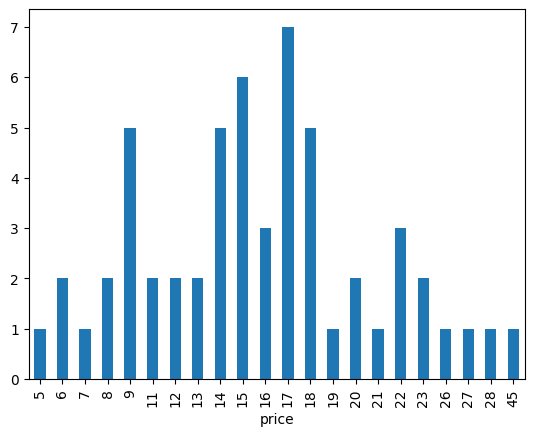

In [146]:
df['price'].value_counts().sort_index().plot(kind='bar')


## GEOCODE

*Prompt*  

I want to geo code addresses using the google maps api. The addresses are stored in the column 'address'. I want to send the api the addresses and then get the lat and long as new columns in my df. I also want to return the status of the api call and the formatted address from the api. 

We know we have some addresses that definitley won't work 

In [166]:
df['address'].str.contains('Multiple').sum()

np.int64(9)

Get my API keys

In [151]:
import os
from dotenv import load_dotenv

# Load .env file
load_dotenv()

# Get API key
google_maps_api_key = os.getenv("GOOGLE_MAPS_API_KEY")

In [155]:
# import pandas as pd
import googlemaps
import time

# Initialize Google Maps API client
# API_KEY = "YOUR_GOOGLE_MAPS_API_KEY"
gmaps = googlemaps.Client(key=google_maps_api_key)

def geocode_address(address):
    """Geocode an address using Google Maps API and return lat, long, status, and formatted address."""
    try:
        response = gmaps.geocode(address)
        if response:
            location = response[0]['geometry']['location']
            formatted_address = response[0]['formatted_address']
            return location['lat'], location['lng'], "OK", formatted_address
        else:
            return None, None, "ZERO_RESULTS", None
    except Exception as e:
        return None, None, "ERROR", str(e)

# Apply geocoding function to each address
df[['latitude', 'longitude', 'api_status', 'formatted_address']] = df['address'].apply(lambda x: pd.Series(geocode_address(x)))

In [170]:
df.columns

Index(['restaurant', 'sandwich_name', 'meta_data', 'description', 'image_url',
       'website', 'address', 'price', 'latitude', 'longitude', 'api_status',
       'formatted_address'],
      dtype='object')

In [171]:
df[['address', 'formatted_address', 'latitude', 'longitude', 'api_status']].head()

,address,formatted_address,latitude,longitude,api_status
0,178 East Seventh Street (Avenue B),"178 E 7th St, New York, NY 10009, USA",40.725077,-73.981695,OK
1,135 India Street (Manhattan Avenue),"135 India St, Brooklyn, NY 11222, USA",40.732407,-73.955044,OK
2,495 Lorimer Street (Powers Street),"495 Lorimer St, Brooklyn, NY 11211, USA",40.711708,-73.949175,OK
3,Multiple locations,None,NaN,NaN,ZERO_RESULTS
4,453 Fourth Avenue (10th Street),"453 N 4th Ave, Tucson, AZ 85705, USA",32.227559,-110.965780,OK


In [172]:
df['api_status'].value_counts()

api_status
OK              46
ZERO_RESULTS    10
Name: count, dtype: int64

Split 'OK' addresses into their own dataframe

In [175]:
geo_df_ok = df[df['api_status'] == 'OK'].copy()

In [176]:
geo_df_ok.shape

(46, 12)

Do the addresses look reasonable?

In [178]:
# geo_df_ok

Split 'ZERO_RESULTS' addresses into their own dataframe

In [180]:
geo_df_bad = df[df['api_status'] == 'ZERO_RESULTS'].copy()

In [181]:
geo_df_bad.shape

(10, 12)

In [182]:
len(geo_df_bad) + len(geo_df_ok)

56

What do the unsuccessful addresses look like?

In [184]:
# geo_df_bad

*Prompts*

Query google maps api by resturant name, wich is stored in the column geo_df_bad['restaurant']. On the same df, return the columns 'formatted_address' (from the api) , 'restaurant_name_api' (from the api), 'latitude', 'longitude', and 'api_status'. Many of the restaurants have multiple addresses, each address should have it's own row.

In [192]:
geo_df_bad.columns

Index(['restaurant', 'sandwich_name', 'meta_data', 'description', 'image_url',
       'website', 'address', 'price', 'latitude', 'longitude', 'api_status',
       'formatted_address', 'restaurant_name_api'],
      dtype='object')

In [ ]:
cols_i_want = [
    'restaurant', 
    'sandwich_name', 
    'description', 
    'image_url', 
    'website', 
    'price', 
    'address', 
    'formatted_address',
    'api_status', 
    'latitude', 
    'longitude'               
]

In [197]:
import re
import googlemaps 
 
gmaps = googlemaps.Client(key=google_maps_api_key)


# Initialize an empty list to collect results
geocode_results_bad = []

# Loop through the DataFrame
for index, row in geo_df_bad.iterrows():

    # Use Google Places API to find all locations for the business
    places_result = gmaps.places(query=row['restaurant'])

    # Extract place names and addresses
    locations = [(place['name'], place['formatted_address']) for place in places_result.get('results', [])]

    # Geocode each location
    for loc in locations:
        place_result = gmaps.geocode(loc[1])
        if place_result:
            geocode_results_bad.append({
                "restaurant": row['restaurant'],
                "sandwich_name": row['sandwich_name'],
                "formatted_address": loc[1],
                "address": row['address'],
                "restaurant_api": loc[0],
                "latitude": place_result[0]['geometry']['location']['lat'],
                "longitude": place_result[0]['geometry']['location']['lng'],
                "sandwich_name": row['sandwich_name']
            })


In [198]:
geo_df_bad_results = pd.DataFrame(geocode_results_bad)

In [200]:
geo_df_bad_results

,restaurant,sandwich_name,formatted_address,address,restaurant_api,latitude,longitude
0,Daily Provisions,The Lumberjack,"225 Liberty St #253, New York, NY 10280, Unite...",Multiple locations,Daily Provisions - Brookfield Place,40.712619,-74.015439
1,Daily Provisions,The Lumberjack,"29 Bedford St, New York, NY 10014, United States",Multiple locations,Daily Provisions - West Village,40.729219,-74.003799
2,Daily Provisions,The Lumberjack,"103 E 19th St, New York, NY 10003, United States",Multiple locations,Daily Provisions - Union Square,40.737663,-73.987608
3,Daily Provisions,The Lumberjack,"151 Court St, Brooklyn, NY 11201, United States",Multiple locations,Daily Provisions - Cobble Hill,40.689008,-73.992525
4,Daily Provisions,The Lumberjack,"132 Bay St, Jersey City, NJ 07302, United States",Multiple locations,Daily Provisions,40.720859,-74.038890
5,Daily Provisions,The Lumberjack,"440 W 33rd St Suite 90, New York, NY 10001, Un...",Multiple locations,Daily Provisions - Manhattan West,40.752579,-73.998898
6,Daily Provisions,The Lumberjack,"30 Rockefeller Center Unit CO-03, New York, NY...",Multiple locations,Daily Provisions – Rockefeller Center,40.759375,-73.979973
7,Daily Provisions,The Lumberjack,"375 Amsterdam Ave, New York, NY 10024, United ...",Multiple locations,Daily Provisions,40.782230,-73.978635
8,Daily Provisions,The Lumberjack,"1381 Madison Ave, New York, NY 10029, United S...",Multiple locations,Daily Provisions - Upper East Side,40.787312,-73.953878
9,Little Egg,Egg katsu sando,"657 Washington Ave, Brooklyn, NY 11238, United...",657 Washington Avenue (St. Marks Avenue),Little Egg,40.677707,-73.963527


In [189]:
geo_df_bad[[
    'restaurant', 'restaurant_name_api', 
    
    'address', 'formatted_address', 
    
    'latitude', 'longitude', 'api_status'
]]

,restaurant,restaurant_name_api,address,formatted_address,latitude,longitude,api_status
3,Daily Provisions,Daily Provisions - Brookfield Place,Multiple locations,"225 Liberty St #253, New York, NY 10280, Unite...",40.712619,-74.015439,OK
5,Little Egg,Little Egg,657 Washington Avenue (St. Marks Avenue),"657 Washington Ave, Brooklyn, NY 11238, United...",40.677704,-73.963590,OK
8,Mama’s Too!,Mama's TOO! Pizzeria West Village,Multiple locations,"325 Bleecker St, New York, NY 10014, United St...",40.733289,-74.004044,OK
11,Regina’s Grocery,Regina's Grocery,Multiple locations,"27 Orchard St, New York, NY 10002, United States",40.715480,-73.991757,OK
13,Alidoro,ALIDORO,Multiple locations,"105 Sullivan St, New York, NY 10012, United St...",40.725730,-74.002881,OK
16,Court Street Grocers,Court Street Grocers,Multiple locations,"485 Court St, Brooklyn, NY 11231, United States",40.676206,-73.998669,OK
33,Milano Market,Milano Market,Multiple locations,"1582 3rd Ave, New York, NY 10128, United States",40.780759,-73.952883,OK
46,Xi’an Famous Foods,Xi'an Famous Foods 西安名吃 | Chinatown,Multiple locations,"45 Bayard St, New York, NY 10013, United States",40.715082,-73.997342,OK
50,Datz Deli,Datz Deli,Multiple locations,"69 Clinton St, New York, NY 10002, United States",40.719363,-73.985112,OK
53,Rowdy Rooster,Rowdy Rooster - East Village,Multiple locations,"149 1st Ave., New York, NY 10003, United States",40.728432,-73.984952,OK


## Create Interactive Google Map

**Task:** 

Generate an HTML template that displays an interactive Google Map with custom sandwich markers. When a marker is clicked, a Bootstrap modal should appear, showing sandwich details (restaurant name, sandwich name, price, description, image, location, website link, and a "Get Directions" link).

**Requirements:**

- Bootstrap for styling, including a fixed-top navbar and a fixed-bottom footer.
- Google Maps API for interactive map functionality.
- Custom Markers: Each marker should use a sandwich image (with transparent background) as its icon.
- Bootstrap Modal: The modal should display:
   - Restaurant Name
   - Sandwich Name
   - Price
   - Description
   - Sandwich Image
   - Restaurant Location
   - Clickable Website Link
   - "Get Directions" link to Google Maps

**Data Structure:** 

The list of sandwich locations should be stored in an array of JavaScript objects. Each object should include:


{
   "name": "Restaurant Name",
   "lat": 40.712776,
   "lng": -74.005974,
   "img": "full_image_url",
   "img_no_bg": "transparent_background_image_url",
   "location": "Restaurant Address",
   "sandwich": "Sandwich Name",
   "price": 12,
   "text": "Detailed sandwich description",
   "website": "restaurant-website.com"
}

**Event Handling:** 

Clicking a marker should populate the modal with data from the corresponding object and display the modal.

**Additional Styling & Functionality:**

- The map should take up 100% width and full viewport height (100vh).
- The modal should be centered and mobile-friendly (modal-lg).
- Use Bootstrap utility classes for alignment and spacing.
- Include jQuery and Bootstrap scripts for modal functionality.

**Expected Output:** 

A full HTML, CSS, and JavaScript template that meets all the above specifications.


In [266]:
# Convert the results to a pandas DataFrame
geo_df_bad_full = pd.DataFrame(geocode_results_bad, columns=['google_address', 'address', 'restaurant', 'latitude', 'longitude', 'sandwich'])

In [267]:
geo_df_bad_full

,google_address,address,restaurant,latitude,longitude,sandwich
0,"225 Liberty St #253, New York, NY 10280, Unite...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Brookfield Place,40.712619,-74.015439,The Lumberjack
1,"29 Bedford St, New York, NY 10014, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - West Village,40.729219,-74.003799,The Lumberjack
2,"103 E 19th St, New York, NY 10003, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Union Square,40.737663,-73.987608,The Lumberjack
3,"151 Court St, Brooklyn, NY 11201, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Cobble Hill,40.689008,-73.992525,The Lumberjack
4,"440 W 33rd St Suite 90, New York, NY 10001, Un...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Manhattan West,40.752579,-73.998898,The Lumberjack
5,"30 Rockefeller Center Unit CO-03, New York, NY...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions – Rockefeller Center,40.759375,-73.979973,The Lumberjack
6,"124 Bay St, Jersey City, NJ 07302, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions,40.720799,-74.038470,The Lumberjack
7,"375 Amsterdam Ave, New York, NY 10024, United ...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Upper West Side,40.782230,-73.978635,The Lumberjack
8,"1381 Madison Ave, New York, NY 10029, United S...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Upper East Side,40.787312,-73.953878,The Lumberjack
9,"657 Washington Ave, Brooklyn, NY 11238, United...","657 Washington Avenue (St. Marks Avenue), $17,...",Little Egg,40.677707,-73.963527,Egg katsu sando


maybe i will just geocode that one rowdy rooster

In [268]:
geo_df_bad_full['clean_address'] = geo_df_bad_full['google_address'].str.replace(', United States', '')


In [269]:
geo_df_bad_full

,google_address,address,restaurant,latitude,longitude,sandwich,clean_address
0,"225 Liberty St #253, New York, NY 10280, Unite...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Brookfield Place,40.712619,-74.015439,The Lumberjack,"225 Liberty St #253, New York, NY 10280"
1,"29 Bedford St, New York, NY 10014, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - West Village,40.729219,-74.003799,The Lumberjack,"29 Bedford St, New York, NY 10014"
2,"103 E 19th St, New York, NY 10003, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Union Square,40.737663,-73.987608,The Lumberjack,"103 E 19th St, New York, NY 10003"
3,"151 Court St, Brooklyn, NY 11201, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Cobble Hill,40.689008,-73.992525,The Lumberjack,"151 Court St, Brooklyn, NY 11201"
4,"440 W 33rd St Suite 90, New York, NY 10001, Un...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Manhattan West,40.752579,-73.998898,The Lumberjack,"440 W 33rd St Suite 90, New York, NY 10001"
5,"30 Rockefeller Center Unit CO-03, New York, NY...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions – Rockefeller Center,40.759375,-73.979973,The Lumberjack,"30 Rockefeller Center Unit CO-03, New York, NY..."
6,"124 Bay St, Jersey City, NJ 07302, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions,40.720799,-74.038470,The Lumberjack,"124 Bay St, Jersey City, NJ 07302"
7,"375 Amsterdam Ave, New York, NY 10024, United ...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Upper West Side,40.782230,-73.978635,The Lumberjack,"375 Amsterdam Ave, New York, NY 10024"
8,"1381 Madison Ave, New York, NY 10029, United S...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Upper East Side,40.787312,-73.953878,The Lumberjack,"1381 Madison Ave, New York, NY 10029"
9,"657 Washington Ave, Brooklyn, NY 11238, United...","657 Washington Avenue (St. Marks Avenue), $17,...",Little Egg,40.677707,-73.963527,Egg katsu sando,"657 Washington Ave, Brooklyn, NY 11238"


In [270]:
substrings_to_remove = [
    "Old Xi’an", 
    "Authentic Xi’an Flavor", 
    "Bites of Xi'an", 
    "Famous Sichuan", 
    "Bites of Xian", 
    "Union Market", 
    "Caputo's Fine Foods",
    "Union Market",
    "Willy Deli Grocery Corp"
]


geo_df_bad_full_filtered = geo_df_bad_full[~geo_df_bad_full['restaurant'].str.contains('|'.join(substrings_to_remove), regex=True)]


In [271]:
geo_df_bad_full_filtered.isna().sum()

google_address    0
address           0
restaurant        0
latitude          0
longitude         0
sandwich          0
clean_address     0
dtype: int64

In [272]:
geo_df_bad_full_filtered.head()

,google_address,address,restaurant,latitude,longitude,sandwich,clean_address
0,"225 Liberty St #253, New York, NY 10280, Unite...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Brookfield Place,40.712619,-74.015439,The Lumberjack,"225 Liberty St #253, New York, NY 10280"
1,"29 Bedford St, New York, NY 10014, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - West Village,40.729219,-74.003799,The Lumberjack,"29 Bedford St, New York, NY 10014"
2,"103 E 19th St, New York, NY 10003, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Union Square,40.737663,-73.987608,The Lumberjack,"103 E 19th St, New York, NY 10003"
3,"151 Court St, Brooklyn, NY 11201, United States","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Cobble Hill,40.689008,-73.992525,The Lumberjack,"151 Court St, Brooklyn, NY 11201"
4,"440 W 33rd St Suite 90, New York, NY 10001, Un...","Multiple locations, $12, dailyprovisionsnyc.com",Daily Provisions - Manhattan West,40.752579,-73.998898,The Lumberjack,"440 W 33rd St Suite 90, New York, NY 10001"


In [273]:
geo_df_bad_full_filtered.columns

Index(['google_address', 'address', 'restaurant', 'latitude', 'longitude',
       'sandwich', 'clean_address'],
      dtype='object')

In [275]:
geo_df_ok.columns

Index(['sandwich', 'address', 'clean_address', 'google_address', 'latitude',
       'longitude', 'resp_stat', 'restaurant'],
      dtype='object')

In [280]:
# geo_df_ok

In [278]:
# sand_df.columns

In [281]:
geo_df_bad_full_filtered.shape[0] + geo_df_ok.shape[0]

91

In [283]:
# geo_df_bad_full_filtered

In [284]:
# geo_df_filtered.shape

In [286]:
geo_df_ok.columns

Index(['sandwich', 'address', 'clean_address', 'google_address', 'latitude',
       'longitude', 'resp_stat', 'restaurant'],
      dtype='object')

In [59]:
cols_to_keep = ['sandwich', 'address', 'clean_address', 'latitude', 'longitude', 'restaurant']

In [287]:
geo_cat_df = pd.concat([geo_df_ok[cols_to_keep], geo_df_bad_full_filtered[cols_to_keep]])

In [288]:
geo_cat_df.shape

(91, 6)

In [289]:
geo_cat_df

,sandwich,address,clean_address,latitude,longitude,restaurant
0,Chorizo egg sandwich,"178 East Seventh Street (Avenue B), $13, candb...",178 East Seventh Street (Avenue B),40.725141,-73.981656,C&B
1,Smoked salmon sandwich,"135 India Street (Manhattan Avenue), $15, radi...",135 India Street (Manhattan Avenue),40.732391,-73.955068,Radio Bakery
2,BEC&L,"495 Lorimer Street (Powers Street), $14, edith...",495 Lorimer Street (Powers Street),40.711708,-73.949175,Edith’s
4,The Newhouse,"453 Fourth Avenue (10th Street), $18, shelskys...",453 Fourth Avenue (10th Street),40.761604,-73.970392,Shelsky’s Brooklyn Bagels
6,Shake Shack breakfast sandwich,"Kennedy International Airport, Terminal 4, $5,...",Kennedy International Airport,40.638134,-73.781193,Kennedy International Airport Terminal 4
...,...,...,...,...,...,...
43,Spicy cumin lamb burger,"Multiple locations, $6, xianfoods.com","309 Amsterdam Ave, New York, NY 10023",40.780120,-73.980185,Xi'an Famous Foods 西安名吃 | 74th&Amsterdam UWS
48,Oxtail Macpatty,"Multiple locations, $14, datzdeliny.com","69 Clinton St, New York, NY 10002",40.719363,-73.985112,Datz Deli
49,Oxtail Macpatty,"Multiple locations, $14, datzdeliny.com","245 W 46th St, New York, NY 10036",40.759641,-73.987011,Datz Deli
50,Oxtail Macpatty,"Multiple locations, $14, datzdeliny.com","190-01 Hollis Ave, Hollis, NY 11423",40.709609,-73.767578,Datz Deli


In [291]:
merged_df = geo_cat_df[[
    'sandwich',
    'latitude',
    'longitude',
    'clean_address',
    'restaurant'
]].merge(sand_df_full[[
    'sandwich', 
    'image_final', 
    'price', 
    'text',
    'website'
]], on='sandwich')

In [292]:
merged_df.shape

(91, 9)

In [293]:
merged_df.head()

,sandwich,latitude,longitude,clean_address,restaurant,image_final,price,text,website
0,Chorizo egg sandwich,40.725141,-73.981656,178 East Seventh Street (Avenue B),C&B,https://static01.nytimes.com/newsgraphics/2024...,13,"Many people wouldn’t guess that C & B, by the ...",candbnyc.com
1,Smoked salmon sandwich,40.732391,-73.955068,135 India Street (Manhattan Avenue),Radio Bakery,https://static01.nytimes.com/newsgraphics/2024...,15,New York is no stranger to smoked salmon — we’...,radiobakery.nyc
2,BEC&L,40.711708,-73.949175,495 Lorimer Street (Powers Street),Edith’s,https://static01.nytimes.com/newsgraphics/2024...,14,Elyssa Heller is a pandemic pop-up success sto...,edithsbk.com
3,The Newhouse,40.761604,-73.970392,453 Fourth Avenue (10th Street),Shelsky’s Brooklyn Bagels,https://static01.nytimes.com/newsgraphics/2024...,18,Bialys and sable can seem like afterthoughts o...,shelskys.com
4,Shake Shack breakfast sandwich,40.638134,-73.781193,Kennedy International Airport,Kennedy International Airport Terminal 4,https://static01.nytimes.com/newsgraphics/2024...,5,Few people head to the airport for an early-mo...,shakeshack.com/location/jfk-airport-nyc


In [294]:
merged_df.isna().sum()

sandwich         0
latitude         0
longitude        0
clean_address    0
restaurant       0
image_final      0
price            0
text             0
website          0
dtype: int64

In [295]:
# is_unique = merged_df.duplicated(subset=['sandwich', 'clean_address']).any()


In [296]:
# is_unique

np.False_

In [66]:
# sand_df.head()

In [67]:
# geo_df.head()

In [68]:
# geo_df_filtered = geo_df[geo_df['resp_stat'] != 'ZERO_RESULTS'].copy()

In [69]:
# geo_df_filtered.shape

In [70]:
# geo_df_filtered.columns

In [71]:
# geo_df_filtered.head()

In [72]:
# sand_df.head() 

In [73]:
# sand_df = sand_df[['restaurant', 'sandwich', 'price', 'website', 'clean_address', 'image']].copy()

In [74]:
# sand_df.columns

In [75]:
# sand_df.head()

In [76]:
# sand_df['sandwich'].nunique()

In [77]:
# geo_df_filtered.head()

In [78]:
# merged_df = sand_df.merge(geo_df_filtered[['sandwich', 'price']], on='sandwich', how='left')

In [79]:
# filtered_geo_df_full

In [80]:
# filtered_geo_df

In [81]:
# geo_df = geo_df[~geo_df['sandwich'].isin(filtered_df['sandwich'])]

In [82]:
# geo_df.isna().sum()

In [83]:
# geo_df.shape

In [84]:
# full_df = pd.concat([geo_df, filtered_geo_df_full], ignore_index=True)

In [85]:
# full_df.isna().sum()

In [86]:
# full_df.tail()

In [87]:
# full_df.shape

In [88]:
# full_df.drop(columns=['resp_stat'], inplace=True)

In [89]:
# full_df

In [90]:
# merged_df = full_df.merge(sand_df[['sandwich', 'image']], on='sandwich', how='left')


In [91]:
# merged_df.tail()

## i need to get the df to look like this, then write back to json, then paste in the html

In [297]:
merged_df.columns

Index(['sandwich', 'latitude', 'longitude', 'clean_address', 'restaurant',
       'image_final', 'price', 'text', 'website'],
      dtype='object')

In [300]:
locations = []
for index, row in merged_df.iterrows():
    location = {
        'name': row['restaurant'],
        'lat': row['latitude'],
        'lng': row['longitude'],
        'img': row['image_final'],
        'location': row['clean_address'],
        'sandwich': row['sandwich'],
        'price': row['price'],
        'text': row['text'],
        'website': row['website']
    }
    locations.append(location)

# locations_str = str(locations)

# .replace("'", '"')


In [301]:
locations 

[{'name': 'C&B',
  'lat': 40.7251413,
  'lng': -73.98165569999999,
  'img': 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_images/breakfast2-@@-300.webp',
  'location': '178 East Seventh Street (Avenue B)',
  'sandwich': 'Chorizo egg sandwich',
  'price': 13,
  'text': 'Many people wouldn’t guess that C & B, by the looks of it, serves some of the finest sandwiches in the city. Ali Sahin’s tiny cafe has been located for nearly a decade on the south side of Tompkins Square Park in the East Village, serving breakfast sandwiches that exemplify why New Yorkers love breakfast sandwiches: they’re simple as can be, but every component is on point. Lining up for a weekend breakfast sandwich there feels a little like being at a model casting — one wonders if the name is a play on “see and be seen” — but ordering well is a great equalizer: a fat, rich chorizo patty straight off the griddle and wobbly scrambled eggs, all piled high on an housemade roll to soak up the sausage’s spi

In [95]:
# import json
# locations_str = json.dumps(locations)


In [96]:
# locations_str

In [97]:
# import json

# # Your original JSON string (ensure it's correctly formatted)
# json_string = locations_str

# try:
#     # Parse JSON from the string
#     data = json.loads(json_string)

#     # Reformat the data
#     formatted_data = [
#         {
#             "name": item["name"],
#             "lat": item["lat"],
#             "lng": item["lng"],
#             "img": item["img"],  # Preserving "@@" in URLs
#             "location": item["location"],
#             "sandwich": item["sandwich"]
#         }
#         for item in data
#     ]

#     # Convert to desired output format
#     formatted_string = ", ".join(
#         f"{{ name: '{item['name']}', lat: {item['lat']}, lng: {item['lng']}, img: '{item['img']}', location: '{item['location']}', sandwich: '{item['sandwich']}',  }}"

#         for item in formatted_data
#     )

#     print(formatted_string)

# except json.JSONDecodeError as e:
#     print("JSON Decode Error:", e)


In [98]:
# json_string

In [99]:
# import json

# # Your long JSON string
# json_string = locations_str  # Replace with your actual long JSON string

# try:
#     data = json.loads(json_string)  # Attempt to parse
# except json.JSONDecodeError as e:
#     error_position = e.pos  # Character position of the error
#     print(f"JSON Decode Error: {e}")

#     # Print 50 characters before and after the error position to inspect the issue
#     start = max(0, error_position - 50)
#     end = min(len(json_string), error_position + 50)
#     print("Surrounding text:", json_string[start:end])


In [100]:
# var locations = [
#                 { name: 'Restaurant 1', lat: 40.712776, lng: -74.005974, img: 'path_to_img1', location: '55 Water Street, New York, NY' },
#                 { name: 'Restaurant 2', lat: 40.730610, lng: -73.935242, img: 'path_to_img2', location: '123 Main Street, New York, NY' },
#                 { name: 'Restaurant 3', lat: 40.749825, lng: -73.987963, img: 'path_to_img3', location: '456 Broadway, New York, NY' }
#             ]

In [575]:
# locations_str

In [708]:
# import json

# formatted_json = json.dumps(json.loads(locations_str), indent=4)
# print(formatted_json)
# # print(locations_str)

In [578]:
# markers = json.loads(formatted_json)
# markers

In [91]:
# # Define patterns to remove
# patterns_to_remove = [r"\u2019s", r"\u897f\u5b89\u540d\u5403", r"\u2019an"]

# # Function to clean name field
# def clean_name(name):
#     for pattern in patterns_to_remove:
#         name = re.sub(pattern, "", name)
#     return name

# # Apply cleaning
# for marker in markers:
#     # print(marker)
#     marker["name"] = clean_name(marker["name"])
    

# # Convert back to formatted JSON
# # formatted_json = json.dumps(locations, indent=4, ensure_ascii=False)

In [203]:
# markers

In [204]:
# \u2019s

# \u897f\u5b89\u540d\u5403

# \u2019an

In [98]:
# pip install rembg

In [93]:
# pip install pillow

In [92]:
# pip install --upgrade pip setuptools wheel

In [91]:
# pip install removebg

In [129]:
# pip install backgroundremover

In [130]:
# pip install pandas

In [131]:
# import os
# import shutil
# import requests
# from io import BytesIO
# # from PIL import Image
# # import backgroundremover
# from backgroundremover.bg import remove
# # from backgroundremover import remove
# # import pandas as pd

In [101]:
# import numpy as np

In [319]:
# pip install numpy


In [107]:
# import numpy as np  

In [318]:
# import os
# import shutil
# import requests
# from io import BytesIO
# from PIL import Image
# from backgroundremover.bg import remove  # Import from backgroundremover
# import pandas as pd

# # Define output folder
# output_folder = "processed_images"

# # If the folder exists, clear it; otherwise, create it
# if os.path.exists(output_folder):
#     shutil.rmtree(output_folder)  # Deletes all files in the folder
# os.makedirs(output_folder, exist_ok=True)

# # Ideal marker size (adjust as needed)
# marker_size = (50, 50)

# # Define the background removal function
# def remove_bg(src_img_path, out_img_path):
#     model_choices = ["u2net", "u2net_human_seg", "u2netp"]
#     with open(src_img_path, "rb") as f:
#         data = f.read()
#         img = remove(data, model_name=model_choices[0],  # Use the first model
#                      alpha_matting=True,
#                      alpha_matting_foreground_threshold=240,
#                      alpha_matting_background_threshold=10,
#                      alpha_matting_erode_structure_size=10,
#                      alpha_matting_base_size=1000)
#     with open(out_img_path, "wb") as f:
#         f.write(img)

# def process_image(url, output_folder, marker_size):
#     try:
#         # Download image
#         response = requests.get(url, timeout=10)
#         response.raise_for_status()
#         img = Image.open(BytesIO(response.content))

#         # Create a temporary file path for the image to save it
#         temp_input_path = os.path.join(output_folder, "temp_input.png")
#         img.save(temp_input_path)

#         # Define output path for the processed image
#         temp_output_path = os.path.join(output_folder, "temp_output.png")

#         # Remove background using remove_bg function
#         remove_bg(temp_input_path, temp_output_path)

#         # Open the processed image with the background removed
#         img_no_bg = Image.open(temp_output_path)

#         # Resize while maintaining aspect ratio
#         img_no_bg.thumbnail(marker_size, Image.LANCZOS)

#         # Save processed image
#         filename = os.path.join(output_folder, os.path.basename(url).split("?")[0])  # Remove query params if any
#         img_no_bg.save(filename, "PNG")

#         # Clean up temporary files
#         os.remove(temp_input_path)
#         os.remove(temp_output_path)

#         return filename
#     except Exception as e:
#         print(f"Error processing {url}: {e}")
#         return None

# # Assuming 'merged_df' is a DataFrame that contains a column 'image' with URLs
# merged_df["processed_image"] = merged_df["image"].apply(lambda url: process_image(url, output_folder, marker_size))


In [317]:
# pip install removebg

In [111]:
# from removebg import RemoveBg

In [316]:
# pip install imagepig


In [ ]:
# 5322382e-1c40-42ee-9966-20e936727394

In [315]:
# from imagepig import ImagePig

# imagepig = ImagePig("5322382e-1c40-42ee-9966-20e936727394")
# result = imagepig.cutout("new_flav.jpeg")
# result.save("new_flav.jpeg")

In [ ]:
merged_df['image']

In [302]:
merged_df.shape

(91, 9)

In [313]:
import os
import shutil
import time
import re
from imagepig import ImagePig

# coments so i don't delete the photos

# Define the directory for saving processed images
# output_dir = "processed_images_new_run"

# Check if the directory exists and delete all files inside
# if os.path.exists(output_dir):
#     for file in os.listdir(output_dir):
#         file_path = os.path.join(output_dir, file)
#         if os.path.isfile(file_path):
#             os.remove(file_path)
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)  # If there are subdirectories, delete them

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Get PIG API key
pig_api_key = os.getenv("PIG_API_KEY")

# Initialize ImagePig API
imagepig = ImagePig(pig_api_key)

# Function to sanitize filenames
def sanitize_filename(name):
    """Sanitize sandwich name to create a valid filename."""
    name = re.sub(r'[^\w\s-]', '', name)  # Remove special characters
    name = name.replace(" ", "_")  # Replace spaces with underscores
    return name.lower()  # Convert to lowercase for consistency

# Loop through each image URL in the 'image' column and process it
image_paths = []  # List to store paths of the processed images
for idx, (img_url, sandwich_name) in enumerate(zip(merged_df['image_final'], merged_df['sandwich'])):
    try:
        # Process the image using ImagePig
        result = imagepig.cutout(img_url)
        
        # Define the output filename using the sanitized sandwich name
        sanitized_name = sanitize_filename(sandwich_name)
        output_filename = f"{sanitized_name}.png"
        output_path = os.path.join(output_dir, output_filename)
        
        # Save the result to a file
        result.save(output_path)
        
        print(f"Processed and saved: {output_filename}")
        
        # Store the output path in the list
        image_paths.append(output_path)

        # If we've processed two images, sleep for a minute to respect the rate limit
        if (idx + 1) % 2 == 0:
            print("Rate limit reached. Sleeping for 60 seconds...")
            time.sleep(60)  # Sleep for 60 seconds (1 minute)
            
    except Exception as e:
        print(f"Failed to process image at {img_url}: {e}")
        image_paths.append(None)  # In case of failure, append None

# Add the image paths back to the DataFrame in the 'images_no_bg' column
merged_df['images_no_bg'] = image_paths


Processed and saved: chorizo_egg_sandwich.png
Processed and saved: smoked_salmon_sandwich.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: becl.png
Processed and saved: the_newhouse.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: shake_shack_breakfast_sandwich.png
Processed and saved: the_italian.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: the_casa.png
Processed and saved: egg_potato_and_cheese_hero.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: the_soho.png
Processed and saved: the_bomb.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: hlt.png
Processed and saved: crispy_chickn.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: scuttlebutt.png
Processed and saved: collard_greens_sandwich_on_focaccia.png
Rate limit reached. Sleeping for 60 seconds...
Processed and saved: french_onion_sandwich.png
Processed and saved: vegan_bbq_pork_bao_bun.png
R

In [314]:
# this is a good one for AI

import os

folder_path = 'processed_images'
file_count = len(os.listdir(folder_path))

print(f"Number of files in '{folder_path}': {file_count}")


Number of files in 'processed_images': 56


In [320]:
merged_df.columns

Index(['sandwich', 'latitude', 'longitude', 'clean_address', 'restaurant',
       'image_final', 'price', 'text', 'website', 'images_no_bg'],
      dtype='object')

In [322]:
locations = []
for index, row in merged_df.iterrows():
    location = {
        'name': row['restaurant'],
        'lat': row['latitude'],
        'lng': row['longitude'],
        'img': row['image_final'],
        'img_no_bg': row['images_no_bg'],
        'location': row['clean_address'],
        'sandwich': row['sandwich'],
        'price': row['price'],
        'text': row['text'],
        'website': row['website']
    }
    locations.append(location)

locations

[{'name': 'C&B',
  'lat': 40.7251413,
  'lng': -73.98165569999999,
  'img': 'https://static01.nytimes.com/newsgraphics/2024-05-21-sandwich/_images/breakfast2-@@-300.webp',
  'img_no_bg': 'processed_images/chorizo_egg_sandwich.png',
  'location': '178 East Seventh Street (Avenue B)',
  'sandwich': 'Chorizo egg sandwich',
  'price': 13,
  'text': 'Many people wouldn’t guess that C & B, by the looks of it, serves some of the finest sandwiches in the city. Ali Sahin’s tiny cafe has been located for nearly a decade on the south side of Tompkins Square Park in the East Village, serving breakfast sandwiches that exemplify why New Yorkers love breakfast sandwiches: they’re simple as can be, but every component is on point. Lining up for a weekend breakfast sandwich there feels a little like being at a model casting — one wonders if the name is a play on “see and be seen” — but ordering well is a great equalizer: a fat, rich chorizo patty straight off the griddle and wobbly scrambled eggs, all 

In [ ]:
# 631 Manhattan Avenue (Nassau Street) is wrong
# it put the marker in manhattan, not in BK, Greenpoint